In [4]:
# importing the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization


#importing the backends
from keras import backend as K
from keras.callbacks import LearningRateScheduler

In [12]:
"""building the architecture of the convolutional neural network"""

from keras.optimizers import SGD
import numpy as np   #linear cal
epoch = 15

dropout = .35
# try dropout -> [.35 , .45 , .55 , .65]

# initilizing the cnn_model
cnn_model = Sequential()

# 1st convolutional step
cnn_model.add(Conv2D(32 , (3,3) , strides = (1,1) , activation = "relu" , input_shape = (64 , 64 , 3)))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(dropout))

# 2nd conv layer with max_pooling
cnn_model.add(Conv2D(32 , (3,3) , strides = (1,1) , activation = "relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(dropout))

# 3rd conv and pooling layer 
cnn_model.add(Conv2D(32 , (3,3) , strides = (1,1) , activation = "relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(dropout))

# 4th conv and pooling layer 
cnn_model.add(Conv2D(32 , (3,3) , strides = (1,1) , activation = "relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(dropout))

# flattening the images
cnn_model.add(Flatten())


# full connection 
cnn_model.add(Dense(units = 128 , activation = "relu"))   # first_fully_connected_hidden_layer
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(dropout))

cnn_model.add(Dense(units = 128 , activation = "relu"))   # second_fully_connected_hidden_layer
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(dropout))

cnn_model.add(Dense(units = 128 , activation = "relu"))   # third_fully_connected_hidden_layer
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(dropout))

cnn_model.add(Dense(units = 1 , activation = "sigmoid"))   # output_layer

# defininig first step decay function
class LossHistory_(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(exp_decay(len(self.losses)))
        print('lr:', exp_decay(len(self.losses)))

# defininig the Exponentail decay function
def exp_decay(epoch):
    initial_lrate = 0.1
    k = 0.1
    lrate = initial_lrate * np.exp(-k*epoch)
    return lrate

lrate = LearningRateScheduler(exp_decay)

# learning schedule callback
loss_history_ = LossHistory_()
lrate_ = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history_ , lrate]


# optimizing the SGD 
momentum = 0.9
opti = SGD(lr = 0.0, momentum = momentum)

# compiling the cnn model
cnn_model.compile(optimizer = opti , loss = "binary_crossentropy" , metrics = ["accuracy"])


In [13]:
"""cnn_model data preprocessing"""

from keras.preprocessing.image import ImageDataGenerator

training_data_generator = ImageDataGenerator( rescale=1./255,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True)

test_data_generator  = ImageDataGenerator(rescale=1./255)

training_dataset  = training_data_generator.flow_from_directory(
                                                        "C:\\Users\\rahul\\Desktop\\chest_xray\\chest_xray\\train",  
                                                          # path of the training dataset images
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                        class_mode='binary')

test_dataset =  test_data_generator.flow_from_directory(
                                                        "C:\\Users\\rahul\\Desktop\\chest_xray\\chest_xray\\test",  
                                                       # path of the test dataset images
                                                        target_size=(64, 64) ,
                                                        batch_size=32,
                                                        class_mode= "binary",
                                                        shuffle = False)

history = cnn_model.fit_generator(
                        training_dataset ,               
                        steps_per_epoch=5216,           # no of pics in the training dataset
                        epochs= 15 ,                     # no of rounds
                        validation_data= test_dataset,  
                        validation_steps=624,             # no of pics in the test dataset
                        verbose= 2,
                        callbacks= callbacks_list)         

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/15
 - 7543s - loss: 0.2138 - accuracy: 0.9173 - val_loss: 1.8296 - val_accuracy: 0.8267
lr: 0.09048374180359596
Epoch 2/15
 - 7221s - loss: 0.1479 - accuracy: 0.9468 - val_loss: 0.2168 - val_accuracy: 0.8822
lr: 0.0818730753077982
Epoch 3/15
 - 7069s - loss: 0.1261 - accuracy: 0.9555 - val_loss: 0.0251 - val_accuracy: 0.8885
lr: 0.0740818220681718
Epoch 4/15
 - 7073s - loss: 0.1159 - accuracy: 0.9590 - val_loss: 0.0651 - val_accuracy: 0.9106
lr: 0.06703200460356394
Epoch 5/15
 - 6943s - loss: 0.1078 - accuracy: 0.9614 - val_loss: 0.0368 - val_accuracy: 0.8996
lr: 0.06065306597126335
Epoch 6/15
 - 6909s - loss: 0.0990 - accuracy: 0.9651 - val_loss: 1.1925 - val_accuracy: 0.8983
lr: 0.05488116360940264
Epoch 7/15
 - 6853s - loss: 0.0894 - accuracy: 0.9678 - val_loss: 0.1672 - val_accuracy: 0.8877
lr: 0.04965853037914095
Epoch 8/15
 - 6822s - loss: 0.0845 - accuracy: 0.9689 - val_loss: 0.0988 - val_

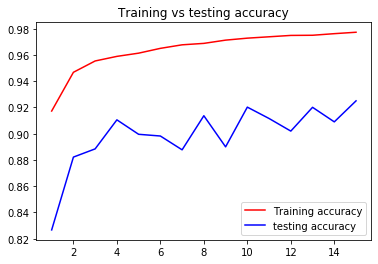

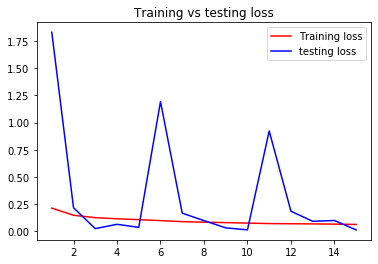

In [14]:
"""visualizing the Result"""

import matplotlib.pyplot as plt

# getting the result from the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#plotting training vs testing accuracy graph

plt.plot(epochs, acc, "red" , label='Training accuracy')
plt.plot(epochs, val_acc, "blue" , label='testing accuracy')
plt.title('Training vs testing accuracy')
plt.legend()

plt.figure()

#plotting training vs testing loss graph

plt.plot(epochs, loss, "red", label= "Training loss")
plt.plot(epochs, val_loss, "blue" , label = "testing loss")
plt.title('Training vs testing loss')
plt.legend()

plt.show()

In [19]:
"""for making new prediction from the Neural net model"""

import numpy as np
from keras.preprocessing import image
test_image = image.load_img("C:\\Users\\rahul\\Desktop\\chest_xray\\chest_xray\\test\\NORMAL\\IM-0006-0001.jpeg", 
                            target_size = (64, 64))

# load_image -> path of the image to check
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
training_dataset.class_indices
if result[0][0] == 1:
    prediction = "Pneumonia"
else:
    prediction = "Normal"

print(prediction)

Normal


In [20]:
# making the confusion matrix

from sklearn.metrics import confusion_matrix

Y_pred = cnn_model.predict_generator(test_dataset , workers = 0, verbose= 1 , 
                                     steps = np.ceil(test_dataset.samples/ test_dataset.batch_size))

y_pred = np.where(Y_pred>0.5 , 1 , 0)

print("Confusion Matrix")
cm = confusion_matrix(test_dataset.classes, y_pred)
print(cm)

# making the classification report

from sklearn.metrics import classification_report
print("Classification Report")
target_names = ["Normal" , "Pneumonia"]
print(classification_report(test_dataset.classes, y_pred , target_names=target_names))

20/20 [==============================] - 11s 526ms/step
Confusion Matrix
[[202  32]
 [ 15 375]]
Classification Report
              precision    recall  f1-score   support

      Normal       0.93      0.86      0.90       234
   Pneumonia       0.92      0.96      0.94       390

    accuracy                           0.92       624
   macro avg       0.93      0.91      0.92       624
weighted avg       0.92      0.92      0.92       624



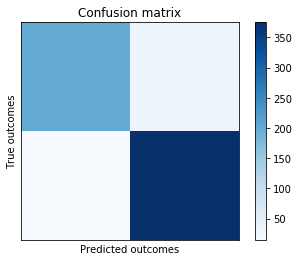

In [21]:
# visualizing the confusion matrix 
import matplotlib.pyplot as plt

plt.imshow(cm , cmap = plt.cm.Blues)
plt.xlabel("Predicted outcomes")
plt.ylabel("True outcomes")
plt.xticks([], [])
plt.yticks([], [])
plt.title("Confusion matrix")
plt.colorbar()
plt.show()